In [1]:
%load_ext nb_black

import numpy as np
import pandas as pd
from scipy.integrate import odeint as scipy_odeint
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [95]:
def _curve1(state, time):

    x, y = state[0], state[1]

    x_dot = x * 1.5 + 2
    y_dot = y * 2 + 1

    return np.array([x_dot, y_dot])


def _curve2(state, time):

    x, y = state[0], state[1]

    x_dot = x * 1.5 + 2
    y_dot = y * -2 - 10

    return np.array([x_dot, y_dot])

<IPython.core.display.Javascript object>

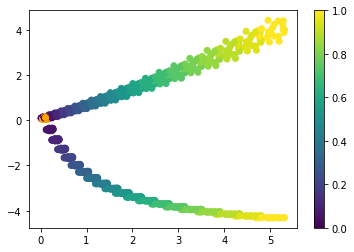

<IPython.core.display.Javascript object>

In [142]:
y0_set = np.random.random([20, 2]) / 6
t = np.linspace(0, 1, 20)

catch1 = np.zeros(
    [
        y0_set.shape[0],
        t.shape[0],
        y0_set.shape[1],
    ]
)

catch2 = np.zeros(
    [
        y0_set.shape[0],
        t.shape[0],
        y0_set.shape[1],
    ]
)

for n, y0 in enumerate(y0_set):
    traj1 = scipy_odeint(func=_curve1, y0=y0, t=t)
    traj2 = scipy_odeint(func=_curve2, y0=y0, t=t)
    catch1[n] = traj1
    catch2[n] = traj2
    plt.scatter(traj1[:, 0], traj1[:, 1], c=t)
    plt.scatter(traj2[:, 0], traj2[:, 1], c=t)
    plt.scatter(y0[0], y0[1], c="orange")

plt.colorbar()

In [143]:
data1 = catch1.reshape(400, 2)
data2 = catch2.reshape(400, 2)

<IPython.core.display.Javascript object>

In [146]:
data1.shape, data2.shape

((400, 2), (400, 2))

<IPython.core.display.Javascript object>

In [150]:
data = np.vstack([data1, data2])

<IPython.core.display.Javascript object>

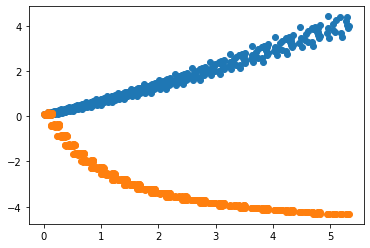

<IPython.core.display.Javascript object>

In [145]:
plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1])

In [153]:
np.random.normal?

<IPython.core.display.Javascript object>

In [161]:
noise = np.random.normal(size=[800, 2]) / 2
data_noise = data + noise

<IPython.core.display.Javascript object>

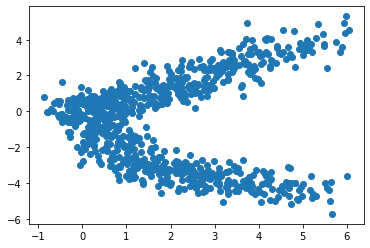

<IPython.core.display.Javascript object>

In [162]:
plt.scatter(data_noise[:, 0], data_noise[:, 1])

In [177]:
obs = {}

obs["traj"] = np.hstack([np.full(20, 0), np.full(20, 1)])
obs["time"] = np.tile(t, 2)

<IPython.core.display.Javascript object>

In [179]:
from anndata import AnnData

<IPython.core.display.Javascript object>

In [180]:
adata = AnnData(data_noise)

<IPython.core.display.Javascript object>

In [181]:
adata.obs = pd.DataFrame.from_dict(obs)

ValueError: Length of passed value for obs_names is 40, but this AnnData has shape: (800, 2)

<IPython.core.display.Javascript object>